**NGUYỄN HỮU THUẬN 19146400_TRAICAY**

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TRAICAY/train/TRAIN',target_size=(150,150),
                                        batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TRAICAY/train/validation',target_size=(150,150),
                                        batch_size=3,class_mode='categorical')

Found 200 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [31]:
train_dataset.class_indices

{'BUOI': 0, 'CAM': 1, 'COC': 2, 'KHE': 3, 'MIT': 4}

In [32]:
#tạo model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 64)      

In [33]:
#tao modle
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
from keras.callbacks import EarlyStopping
 
#train 
history = model.fit(train_dataset,epochs=10,
                    validation_data = validation_dataset,
                    callbacks=[EarlyStopping(monitor='val_loss',patience=20)], verbose=1)      

Epoch 1/10
67/67 [==============================] - 192s 3s/step - loss: 21.6244 - accuracy: 0.6100 - val_loss: 4.5775 - val_accuracy: 0.4400
Epoch 2/10
67/67 [==============================] - 2s 35ms/step - loss: 3.1360 - accuracy: 0.8700 - val_loss: 1.0903 - val_accuracy: 0.7950
Epoch 3/10
67/67 [==============================] - 2s 35ms/step - loss: 0.9106 - accuracy: 0.9650 - val_loss: 1.3171 - val_accuracy: 0.8350
Epoch 4/10
67/67 [==============================] - 2s 36ms/step - loss: 1.4475 - accuracy: 0.9650 - val_loss: 3.9053 - val_accuracy: 0.7200
Epoch 5/10
67/67 [==============================] - 2s 36ms/step - loss: 2.1931 - accuracy: 0.9100 - val_loss: 2.2056 - val_accuracy: 0.7950
Epoch 6/10
67/67 [==============================] - 2s 36ms/step - loss: 4.6327e-04 - accuracy: 1.0000 - val_loss: 2.6463 - val_accuracy: 0.8400
Epoch 7/10
67/67 [==============================] - 2s 37ms/step - loss: 2.5630e-08 - accuracy: 1.0000 - val_loss: 2.6402 - val_accuracy: 0.8400
Epoc

In [35]:
model.save('CNNTRAICAY_Recognition.h5')

Sai số kiểm tra là:  2.702744722366333
Độ chính xác kiểm tra là:  0.8199999928474426


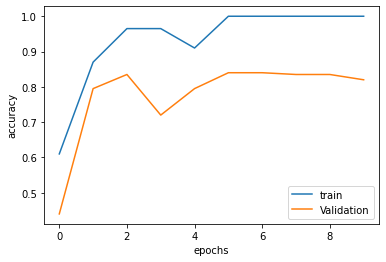

In [36]:
# ve do thi
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [37]:
classes = validation_dataset.class_indices

classes = list(classes.keys())

for i in range(0,4):
    classes[i]=classes[i]

classes

['BUOI', 'CAM', 'COC', 'KHE', 'MIT']

trai [0]


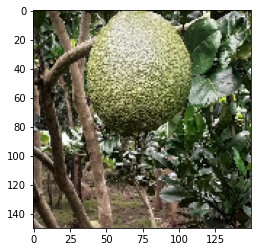

In [63]:
img_path = '/content/drive/MyDrive/Colab Notebooks/TRAICAY/test/Buoi_00093.jpg'

img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

trai=np.argmax(model.predict(img),axis=1)
pred = model.predict(img)
print("trai",+trai)